<h1 align='center'>  Árbol de Decisión </h1> 

Los árboles de decisión trabajan de manera descendente y la división de nodos es un concepto importante para cualquier algoritmo de árboles de decisión. La mayoría de los algorítmos tienen un enfoque codicioso a la hora de dividir el espacio de entrada en subconjuntos.

El proceso más básico en términos simples es probar y dividir los datos usando diferentes atributos y funciones de costo. En cada paso se selecciona la división que ressulta menos costosa. Los problemas de clasificación y regresión utilizan diferentes funciones de costos. Algunas de estas se mencionan a continuación:

* **Error Cuadrático Medio**: Es usada principalmente para árboles de regresión, esta calcula el cuadrado de las diferencias entre el valor observado y predicho.

* **Error Absoluto Medio**: Es usada para árboles de regresión, es similar al error cuadrático medio, solo que usa la diferencia en valor absoluto. 

* **Reducción de Varianza**:  Este fue el primero que se introdujo con el algoritmo CART. Se usa la fórmula estándar de la varianza y se selecciona aquel resultado que minimiza la varianza.

* **Impureza de Gini**: Es usado principalmente en clasificación, esta medida viene dada por:
 $$\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$$


* **Ganancia de información**: Es utilizado en árboles de clasificación, en este caso la partición busca aumentar la pureza respecto al nodo padre. Los criterios usado para medir la impureza son los siguientes:

* $\displaystyle\mbox{Entropia(t)} = -\sum_{i=0}^{c-1}p(i/t)log_{2}(p(i/t))$

* $\displaystyle\mbox{Gini(t)} = 1-\sum_{i=0}^{c-1}[p(i/t)]^2$

* $\displaystyle \mbox{Error de clasificacion(t)} = 1 - \max_{i}[p(i/t)]$

## Criterios para detener una partición

Existen diferentes criterios para evitar que un árbol crezca hasta alcanzar demasiada complejidad, algunos de estos criterios son:

* **Prepoda**: Consiste en definir un umbral para la Ganancia de Información y si, en un nodo determinado, ninguna de las particiones proporciona una ganancia mayor al umbral, se para el desarrollo de subárboles en dicho nodo. es facil de implementar, sin embargo tiene la desventaja que no se conoce a priori el umbral óptimo.

* **Poda**: Consiste en desarrollar el árbol completo hasta tener particiones completamente puras y a partir de allí comenzar a eliminar ramas del árbol usando algún criterio. Los dos criterios más utilizados son:
    * Reemplazar subárboles por hojas si estos no proporcionan una ganacia suficiente de información.
    * Reemplazar subárboles por árboles más simples.

**gini**

La impureza de gini se calcula utilizando la siguiente fórmula:

La impureza gini mide la frecuencia con la que cualquier elemento del conjunto de datos se etiquetará incorrectamente cuando se etiqueta al azar.

El valor mínimo del Índice Gini es 0. Esto sucede cuando el nodo es puro , esto significa que todos los elementos contenidos en el nodo son de una sola clase. Por lo tanto, este nodo no se dividirá nuevamente. Así, la división óptima es elegida por las características con menor índice de Gini. Además, obtiene el valor máximo cuando la probabilidad de las dos clases es la misma.

G i nim i n= 1 – (12) = 0
G i nimx _ _= 1 – (0.52+0.52) = 0,5

**entropía**

La entropía es una medida de información que indica el desorden de las características con el objetivo. Similar al Índice Gini, la división óptima es elegida por la característica con menos entropía. Obtiene su valor máximo cuando la probabilidad de las dos clases es la misma y un nodo es puro cuando la entropía tiene su valor mínimo, que es 0:

El Índice Gini y la Entropía tienen dos diferencias principales:

**El Índice Gini tiene valores dentro del intervalo [0, 0.5] mientras que el intervalo de la Entropía es [0, 1].**

## Ejemplo de un Árbol de Decisión

Supongamos que tenemos un dataset hipotético de modelos de vehiculos de diferentes fábricas, de los cuales sse dispone las siguientes características: **Capacidad de combustible, motor, precio, años de compra, kilometros recorridos y kilometros por litro.**  Con esta data queremos crear un modelo que pueda predecir el rendimiento en kilometros por litro de un vehiculo.

El arbol de decisión para este ejemplo es el siguiente:

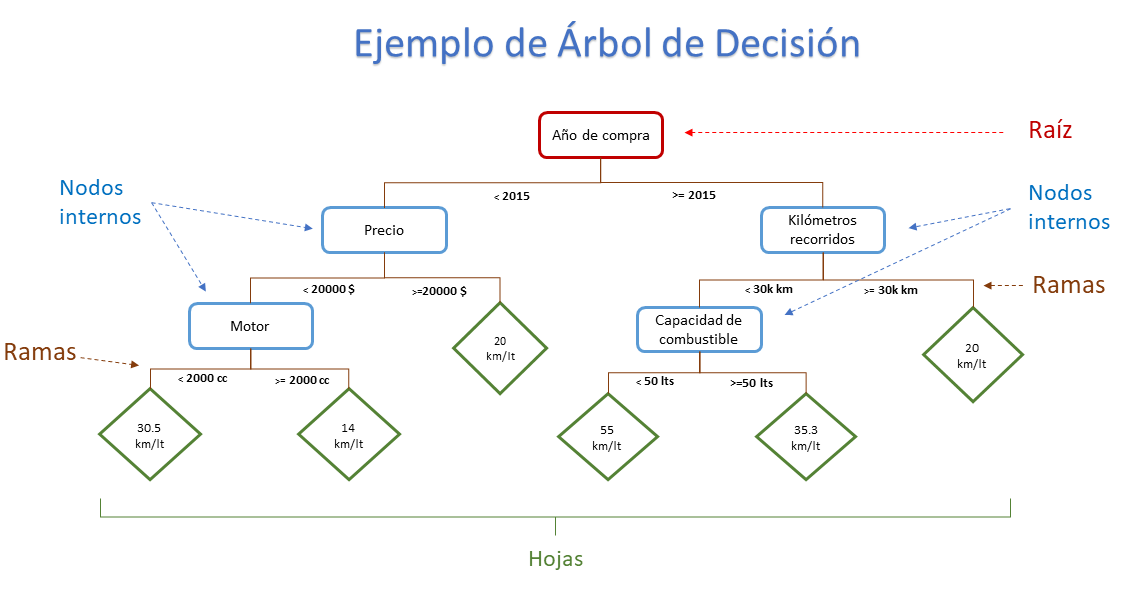

<h2> Mapa </h2>
<ul>
    <li>1-. Formular la pregunta y determinar el modelo</li>
    <li>2-. Adquisición de datos</li>
    <li>3-. Identificación y corrección de los puntos de datos faltantes/anomalías según sea necesario</li>
    <li>4-. Preprocesar los datos</li>
    <li>5-. Entrenar el modelo en los datos de entrenamiento</li>
    <li>6-. Predicciones sobre los datos de prueba y metricas de rendimiento</li>
    <li>7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento</li>
    <li>8-. Importancia de los predictores</li>
</ul>

# 2-. Adquisición de datos
Primero, necesitamos algunos datos. Para usar un ejemplo realista, recuperé datos de pacientes del Hospital Herminda Martin de Chillan. En general, aproximadamente el 80 % del tiempo dedicado al análisis de datos es limpiar y recuperar datos, pero esta carga de trabajo se puede reducir encontrando fuentes de datos de alta calidad.

In [1]:
# Libreria para la manipulación de los datos
import pandas as pd
import numpy as np

# Leer el dataframe
dataframe = pd.read_excel('../bdd/bdd_final.xlsx')
dataframe.head(5)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2.012418e+09,11998898.0,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2.000150e+09,12002852.0,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,9.808599e+07,12003092.0,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9.772094e+06,11995391.0,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,9.809511e+07,12014450.0,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949


In [2]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 75 pacientes con 85 variables.


# 3-. Identificación y corrección de los puntos de datos faltantes/anomalías según sea necesario

En este item, la base de datos será rellenada.

## Eliminación las filas de los pacientes que se expulsaron de la BDD

In [3]:
dataframe.drop(dataframe[(dataframe['diag Elopez'] == 'out')].index, inplace=True)
dataframe.head(7)

,CLAVE,COMUNA,TELEFONOS,FICHA CLINICA,CTA CTE,EDAD,PESO,TALLA,HTA,DIABETES,...,logVEGF,logPlGF,logPCR,PCR/VEGF ratio,PCR/PLGF ratio,IL-6 (pg/ml),IL-6 corregida,log IL-6,IL-6/VEGF,IL-6/PlGF
0,1,san carlos,NaN,2.012418e+09,11998898.0,53.0,NaN,NaN,NaN,NaN,...,1.768165,0.973961,0.170262,0.096293,0.174814,18.586835,0.156953,-0.804231,-0.454840,-0.825732
1,2,coihueco,41723921-74822219,2.000150e+09,12002852.0,54.0,88.0,165.0,si,si,...,2.143150,1.749737,0.222716,0.103920,0.127286,1.263441,0.012818,-1.892186,-0.882899,-1.081411
2,3,chillan,71818219-50323843,9.808599e+07,12003092.0,78.0,NaN,NaN,si,si,...,1.560877,1.213371,1.083144,0.693933,0.892673,49.091862,0.436365,-0.360150,-0.230736,-0.296817
3,4,coihueco,77107584-93406930,9.772094e+06,11995391.0,87.0,52.5,NaN,si,si,...,2.254849,1.660278,0.060698,0.026919,0.036559,96.544126,0.934859,-0.029254,-0.012974,-0.017620
4,5,yungay,99240760-77884029,9.809511e+07,12014450.0,69.0,94.0,NaN,si,si,...,2.015323,1.741045,0.107210,0.053197,0.061578,43.309864,0.379102,-0.421244,-0.209021,-0.241949
5,6,chillan,2225404-81923149,2.000139e+09,12015366.0,90.0,69.0,NaN,si,si,...,1.811635,1.701929,1.322012,0.729734,0.776773,4.897850,0.048574,-1.313598,-0.725090,-0.771829
7,8,chillan,56010835-91599074,2.000149e+09,12032742.0,90.0,NaN,NaN,si,no,...,2.415599,2.081507,1.787319,0.739907,0.858666,13.519904,0.122450,-0.912042,-0.377564,-0.438164


In [4]:
print('Existen {} pacientes con {} variables.'.format(*dataframe.shape))

Existen 46 pacientes con 85 variables.


## Variables signaificativas para la investigación

### SOBRE EL DATASET

>**HTA**: ```"si" o "no"```

>**DIABETES**: ```"si" o "no"```

>**EDAD**: ```Edad del paciente```

>**GLUCOSA**: ```Nivel de azucar en la sangre```

>**COL. TOTAL**: ```Cantidad de Colesterol en la sangre```

>**TRIGLICERIDOS**: ```Cantidad de trigliceridos en la sangre```

>**INR**: ```Índice internacional normalizado (INR, por sus siglas en inglés) es un tipo de cálculo que se basa en los resultados de las pruebas de tiempo de protrombina```

>**CONTEO G.B.**: ```Conteo de globulos blancos en la sangre```

>**GLASGOW AL INICO ACV**: ```Escala de 15 puntos medica que es para medir el estado de conciencia. Esta pertence a la Inicial```

>**NIHSS INICO ACV**: ```Escala de 42 puntos más empleada para la valoración de funciones neurológicas básicas en la fase aguda del ictus isquémico, tanto al inicio como durante su evolución. Esta pertence a la Inicial```

>**NIHSS alta ACV**: ```Pertenece cuando es dado de alta el paciente```

In [5]:
# Tomaremos las variables más significativas para la investigación
columnasMuestra = ['HTA', 'DIABETES', 'EDAD', 'GLUCOSA', 'COL. TOTAL', 'TRIGLICERIDOS', 'INR', 'CONTEO G.B.', 'GLASGOW AL INICO ACV', 'NIHSS INICO ACV', 'NIHSS alta ACV']
dataset = dataframe[[*columnasMuestra]]

### Descripción general de los datos


In [6]:
# Check Dataset:

def check_data(dataframe,head=5):
    print(20*"-" + "Información".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Forma de datos".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "Los primeros 5 datos".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "Los últimos 5 datos".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Data".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describir los datos".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(dataset)

--------------------    Información     --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HTA                   42 non-null     object 
 1   DIABETES              34 non-null     object 
 2   EDAD                  44 non-null     float64
 3   GLUCOSA               38 non-null     float64
 4   COL. TOTAL            40 non-null     float64
 5   TRIGLICERIDOS         40 non-null     float64
 6   INR                   37 non-null     float64
 7   CONTEO G.B.           46 non-null     float64
 8   GLASGOW AL INICO ACV  29 non-null     float64
 9   NIHSS INICO ACV       39 non-null     float64
 10  NIHSS alta ACV        32 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.3+ KB
None
--------------------   Forma de datos   --------------------
(46, 11)

--------------------Los primeros 5 datos-----

### Missing data

In [7]:
valores_por_defecto = {
                         'HTA': "DESCONOCIDO",
                       'DIABETES' : "DESCONOCIDO",
                       'EDAD':dataset["EDAD"].median().round(),
                       'GLUCOSA':dataset["GLUCOSA"].median(),
                       'COL. TOTAL':dataset["COL. TOTAL"].median(), 
                       'TRIGLICERIDOS':dataset["TRIGLICERIDOS"].median(),
                       'INR':dataset["INR"].median(),
                       'CONTEO G.B.':dataset["CONTEO G.B."].median(),
                       'GLASGOW AL INICO ACV':dataset["GLASGOW AL INICO ACV"].median().round(),
                       'NIHSS INICO ACV':dataset["NIHSS INICO ACV"].median().round(), 
                       'NIHSS alta ACV':dataset["NIHSS alta ACV"].median().round(), 
                      }
# Missing Data
dataset = dataset.fillna(value=valores_por_defecto)
dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,42.0
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,0.0
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,2.0
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,0.0
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,2.0


In [8]:
print('Existen {} pacientes con {} variables.'.format(*dataset.shape))

Existen 46 pacientes con 11 variables.


In [9]:
# Check Dataset:

def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "The Last 5 Data".center(20) + 20 * "-")
    print(dataframe.tail())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe().T)
check_data(dataset)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HTA                   46 non-null     object 
 1   DIABETES              46 non-null     object 
 2   EDAD                  46 non-null     float64
 3   GLUCOSA               46 non-null     float64
 4   COL. TOTAL            46 non-null     float64
 5   TRIGLICERIDOS         46 non-null     float64
 6   INR                   46 non-null     float64
 7   CONTEO G.B.           46 non-null     float64
 8   GLASGOW AL INICO ACV  46 non-null     float64
 9   NIHSS INICO ACV       46 non-null     float64
 10  NIHSS alta ACV        46 non-null     float64
dtypes: float64(9), object(2)
memory usage: 4.3+ KB
None
--------------------     Data Shape     --------------------
(46, 11)

--------------------  The First 5 Data  -----

## Visualización de las variables

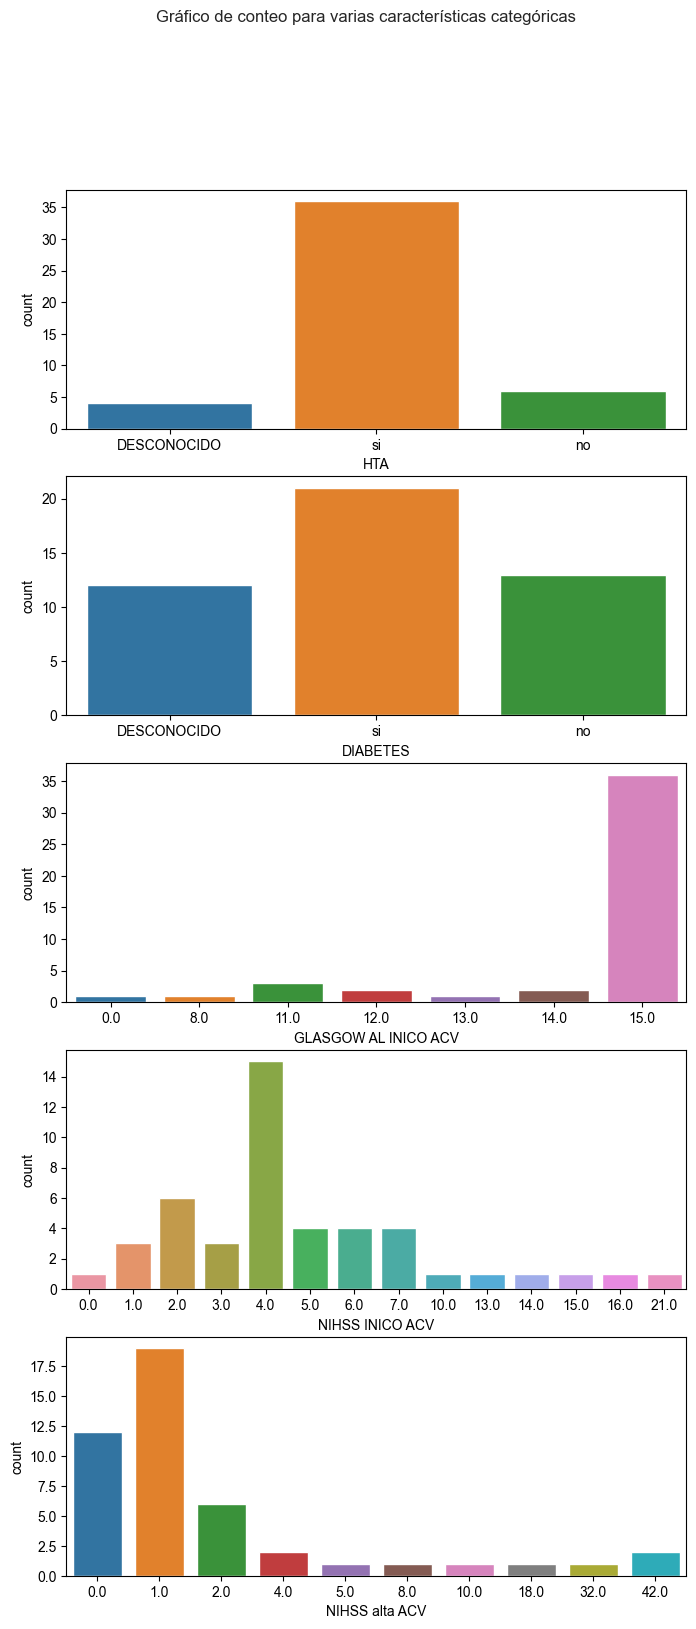

In [10]:
# Para gráficos matpltlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import style


fig,axes = plt.subplots(5, figsize = (8, 18))
sns.set_style('darkgrid')
fig.suptitle("Gráfico de conteo para varias características categóricas")

sns.countplot(ax=axes[0],data=dataset,x='HTA')
sns.countplot(ax=axes[1],data=dataset,x='DIABETES')
sns.countplot(ax=axes[2],data=dataset,x='GLASGOW AL INICO ACV')
sns.countplot(ax=axes[3],data=dataset,x='NIHSS INICO ACV')
sns.countplot(ax=axes[4],data=dataset,x='NIHSS alta ACV')

plt.show()

C:\Users\Abraham\AppData\Local\Temp\ipykernel_18668\1091370767.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['EDAD'], bins=30, color='darkred', ax=axes[0, 0])
C:\Users\Abraham\AppData\Local\Temp\ipykernel_18668\1091370767.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[

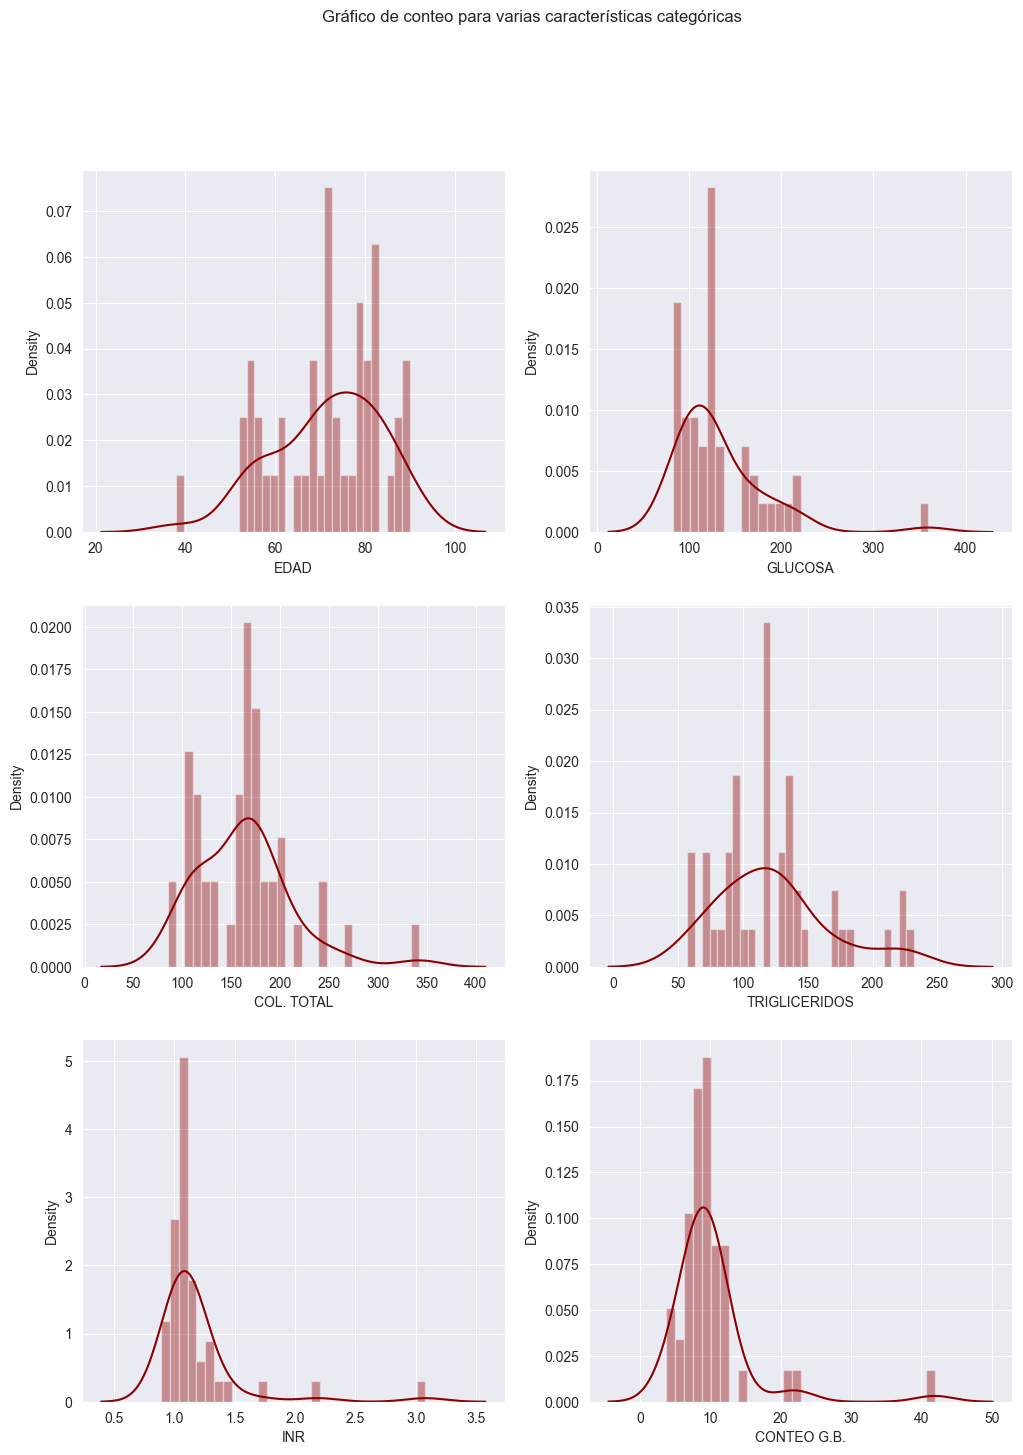

In [11]:
fig,axes = plt.subplots(3, 2, figsize = (12, 16))
sns.set_style('darkgrid')
fig.suptitle("Gráfico de conteo para varias características categóricas")

# Variables muy dispersas
sns.distplot(dataset['EDAD'], bins=30, color='darkred', ax=axes[0, 0])
sns.distplot(dataset['GLUCOSA'], bins=30, color='darkred', ax=axes[0, 1])
sns.distplot(dataset['COL. TOTAL'], bins=30, color='darkred', ax=axes[1, 0])
sns.distplot(dataset['TRIGLICERIDOS'], bins=30, color='darkred', ax=axes[1, 1])
sns.distplot(dataset['INR'], bins=30, color='darkred', ax=axes[2, 0])
sns.distplot(dataset['CONTEO G.B.'], bins=30, color='darkred', ax=axes[2, 1])

plt.show()

### Distibución de Diabetes e Hipertensión

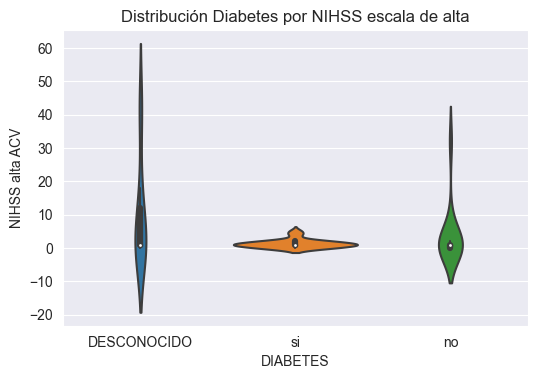

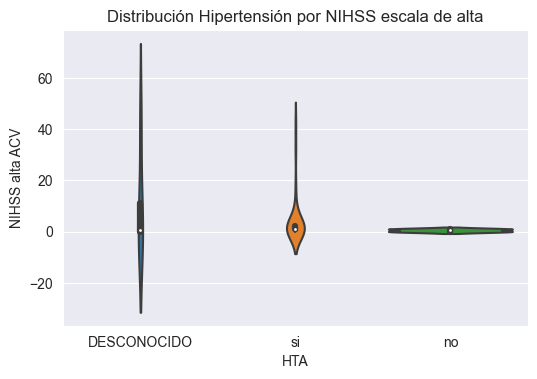

In [12]:
fig, ax = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'DIABETES',
        y     = 'NIHSS alta ACV',
        data  = dataset,
        #color = "white",
        ax    = ax
    )

ax.set_title('Distribución Diabetes por NIHSS escala de alta');

fig, ax2 = plt.subplots(figsize=(6, 3.84))

sns.violinplot(
        x     = 'HTA',
        y     = 'NIHSS alta ACV',
        data  = dataset,
        #color = "white",
        ax    = ax2
    )

ax2.set_title('Distribución Hipertensión por NIHSS escala de alta');

### Mapa de calor de variables numéricas

C:\Users\Abraham\AppData\Local\Temp\ipykernel_18668\2221177336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


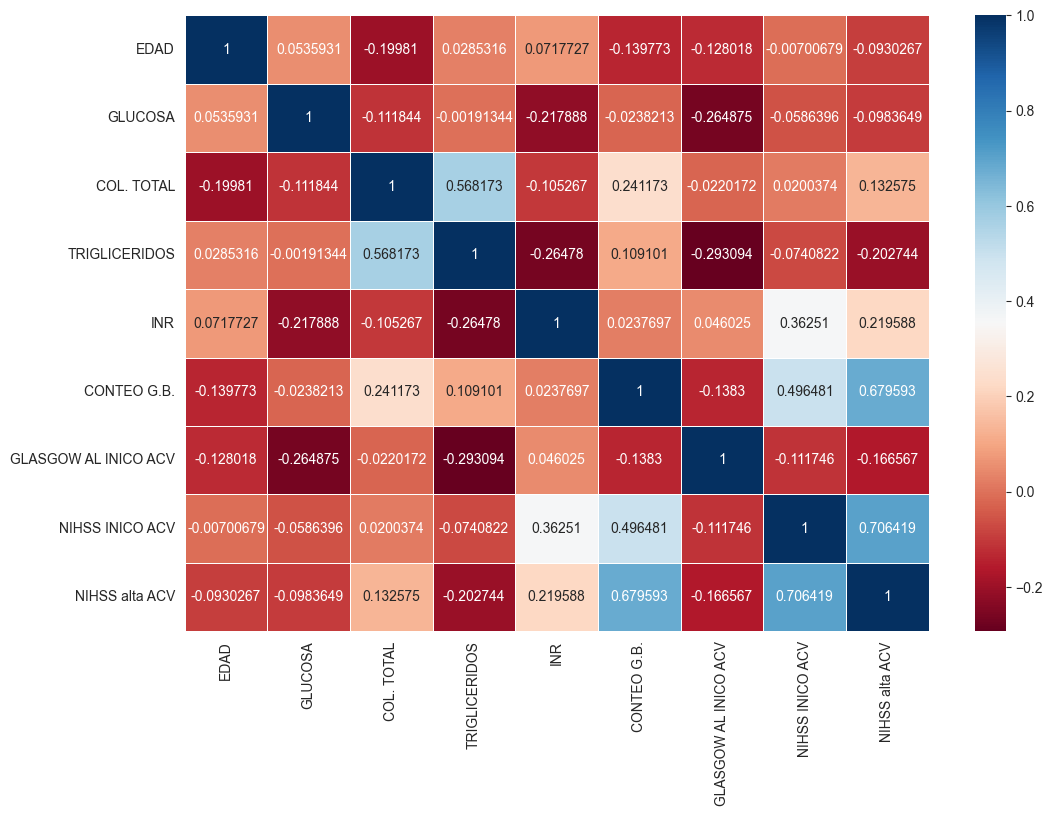

In [13]:
fig = plt.figure(figsize=(12,8))
corr = dataset.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")

# 4-. Preprocesar los datos
Preparar los datos para el modelo de aprendizaje automático

## Preparación de datos

Los pasos exactos para la preparación de los datos dependerán del modelo utilizado y de los datos recopilados, pero se requerirá cierta cantidad de manipulación de datos para cualquier aplicación de aprendizaje automático.

## Análisis de datos y clasifiación

Aqui se análizaran los datos a trabajar.

### Análisis de variable Objetivo
Variable más importante que nos interesa tener predicción.
 
#### Número de clase

In [14]:
dataset["NIHSS alta ACV"].value_counts()

1.0     19
0.0     12
2.0      6
42.0     2
4.0      2
8.0      1
10.0     1
18.0     1
32.0     1
5.0      1
Name: NIHSS alta ACV, dtype: int64

### Crear columna para NIHSS_INICO_CLASIFICADOR

Esta columna nos servira para clasificación de los estados de la variable

In [15]:
condicionesALTA = [
    (dataset['NIHSS alta ACV'] == 0),
    (dataset['NIHSS alta ACV'] == 1),
    (dataset['NIHSS alta ACV'] >= 2) & (dataset['NIHSS alta ACV'] <= 5),
    (dataset['NIHSS alta ACV'] >= 6) & (dataset['NIHSS alta ACV'] <= 15),
    (dataset['NIHSS alta ACV'] >= 16) & (dataset['NIHSS alta ACV'] <= 20),
    (dataset['NIHSS alta ACV'] > 20),
]
valoresALTA = ["Sin Déficit", "Déficit Mínimo", "Leve (Trombolisando)", "Moderado (Buen Pronostico)", "Déficit Importante", "Grave"]
dataset['NIHSS_alta_cat'] = np.select(condicionesALTA, valoresALTA)
dataset['NIHSS_alta_cat'].value_counts()

Déficit Mínimo                19
Sin Déficit                   12
Leve (Trombolisando)           9
Grave                          3
Moderado (Buen Pronostico)     2
Déficit Importante             1
Name: NIHSS_alta_cat, dtype: int64

In [16]:
dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV,NIHSS_alta_cat
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,42.0,Grave
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,0.0,Sin Déficit
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,2.0,Leve (Trombolisando)
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,0.0,Sin Déficit
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,2.0,Leve (Trombolisando)


### Crear columna para NIHSS_INICO_ESTABLE_CRITICO

Esta columna nos ayudará a observar si el paciente esta estable o critico. Nos interesa saber el pronostico del paciente, por eso es necesaria una variable binaria sobre el alta del paciente.

In [17]:
dataset['NIHSS_alta_ESTABLE_O_GRAVE'] = np.where(dataframe['NIHSS alta ACV'] <=6, 0, 1)

dataset['NIHSS_alta_ESTABLE_O_GRAVE'].value_counts()


0    26
1    20
Name: NIHSS_alta_ESTABLE_O_GRAVE, dtype: int64

In [18]:
round(dataset.describe(), 2)

,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,NIHSS alta ACV,NIHSS_alta_ESTABLE_O_GRAVE
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,71.54,132.83,162.78,122.87,1.18,10.12,14.04,5.33,4.26,0.43
std,12.03,50.19,48.77,43.46,0.36,5.91,2.60,4.26,9.78,0.50
min,38.00,82.61,85.00,57.00,0.89,3.76,0.00,0.00,0.00,0.00
25%,62.75,101.06,121.00,93.00,1.03,7.82,15.00,3.00,0.25,0.00
50%,72.00,120.00,163.00,119.00,1.09,9.30,15.00,4.00,1.00,0.00
75%,80.00,154.98,182.50,137.00,1.15,10.38,15.00,6.00,2.00,1.00
max,90.00,359.42,342.00,232.00,3.08,41.90,15.00,21.00,42.00,1.00


### Análisis de las las Escalas de INICIO del ACV

In [19]:
# Análisis NIHSS INICO ACV

print(f'NIHSS INICO ACV Variable min: {dataset["NIHSS INICO ACV"].min()}')
print(f'NIHSS INICO ACV Variable max: {dataset["NIHSS INICO ACV"].max()}')
print(f'NIHSS INICO ACV Variable: {dataset["NIHSS INICO ACV"].nunique()}')

NIHSS INICO ACV Variable min: 0.0
NIHSS INICO ACV Variable max: 21.0
NIHSS INICO ACV Variable: 14


In [20]:
# Realizamos la clasificación de la escala

condicionesINICIO = [
    (dataset['NIHSS INICO ACV'] == 0),
    (dataset['NIHSS INICO ACV'] == 1),
    (dataset['NIHSS INICO ACV'] >= 2) & (dataset['NIHSS INICO ACV'] <= 5),
    (dataset['NIHSS INICO ACV'] >= 6) & (dataset['NIHSS INICO ACV'] <= 15),
    (dataset['NIHSS INICO ACV'] >= 16) & (dataset['NIHSS INICO ACV'] <= 20),
    (dataset['NIHSS INICO ACV'] > 20),
]
valoresINICIO = ["Sin Déficit", "Déficit Mínimo", "Leve (Trombolisando)", "Moderado (Buen Pronostico)", "Déficit Importante", "Grave"]
dataset['NIHSS_INICIO_cat'] = np.select(condicionesINICIO, valoresINICIO)
dataset['NIHSS_INICIO_cat'].value_counts()

Leve (Trombolisando)          28
Moderado (Buen Pronostico)    12
Déficit Mínimo                 3
Grave                          1
Déficit Importante             1
Sin Déficit                    1
Name: NIHSS_INICIO_cat, dtype: int64

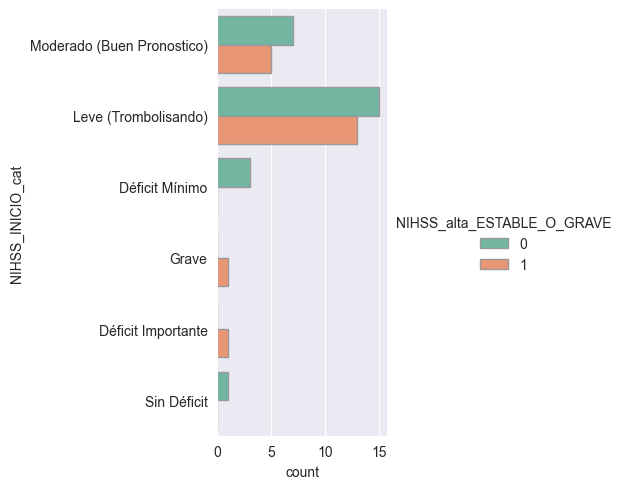

In [21]:
sns.catplot(y="NIHSS_INICIO_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [22]:
# Análisis GLASGOW AL INICO ACV

print(f'GLASGOW AL INICO ACV Variable min: {dataset["GLASGOW AL INICO ACV"].min()}')
print(f'GLASGOW AL INICO ACV Variable max: {dataset["GLASGOW AL INICO ACV"].max()}')
print(f'GLASGOW AL INICO ACV Variable: {dataset["GLASGOW AL INICO ACV"].nunique()}')

GLASGOW AL INICO ACV Variable min: 0.0
GLASGOW AL INICO ACV Variable max: 15.0
GLASGOW AL INICO ACV Variable: 7


In [23]:
dataset['GLASGOW_cat'] = pd.cut(dataset['GLASGOW AL INICO ACV'], bins=[-1, 8, 12, 15], labels=['Grave', 'Moderado', 'Leve'])

dataset['GLASGOW_cat'].unique()

['Moderado', 'Leve', 'Grave']
Categories (3, object): ['Grave' < 'Moderado' < 'Leve']

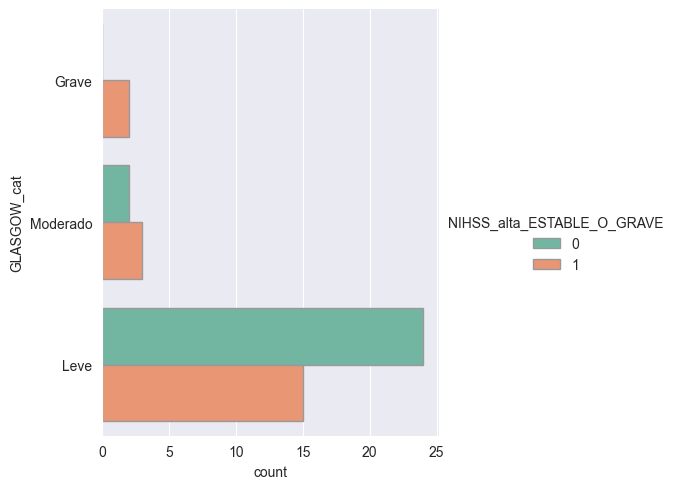

In [24]:
sns.catplot(y="GLASGOW_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

### Análisis de variables de médicas

In [25]:
# Análisis CONTEO G.B.

print(f'CONTEO G.B. Variable min: {dataset["CONTEO G.B."].min()}')
print(f'CONTEO G.B. Variable max: {dataset["CONTEO G.B."].max()}')
print(f'CONTEO G.B. Variable: {dataset["CONTEO G.B."].nunique()}')

CONTEO G.B. Variable min: 3.76
CONTEO G.B. Variable max: 41.9
CONTEO G.B. Variable: 38


In [26]:
dataset['CONTEO G.B._cat'] = pd.cut(dataset['CONTEO G.B.'], bins=[0, 4.5, 10,1000], labels=['Bajo', 'Normal', 'Alto'])

dataset['CONTEO G.B._cat'].unique()

['Alto', 'Normal', 'Bajo']
Categories (3, object): ['Bajo' < 'Normal' < 'Alto']

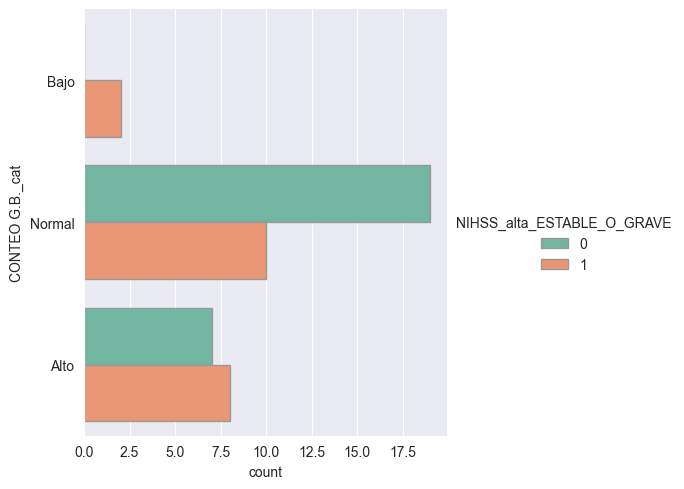

In [27]:
sns.catplot(y="CONTEO G.B._cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [28]:
# Análisis INR

print(f'INR Variable min: {dataset["INR"].min()}')
print(f'INR Variable max: {dataset["INR"].max()}')
print(f'INR Variable: {dataset["INR"].nunique()}')

INR Variable min: 0.89
INR Variable max: 3.08
INR Variable: 26


In [29]:
dataset['INR_cat'] = pd.cut(dataset['INR'], bins=[0.0, 2, 4,1000], labels=['Riesgo', 'Normal', 'No Anticoagula'])

dataset['INR_cat'].unique()

['Riesgo', 'Normal']
Categories (3, object): ['Riesgo' < 'Normal' < 'No Anticoagula']

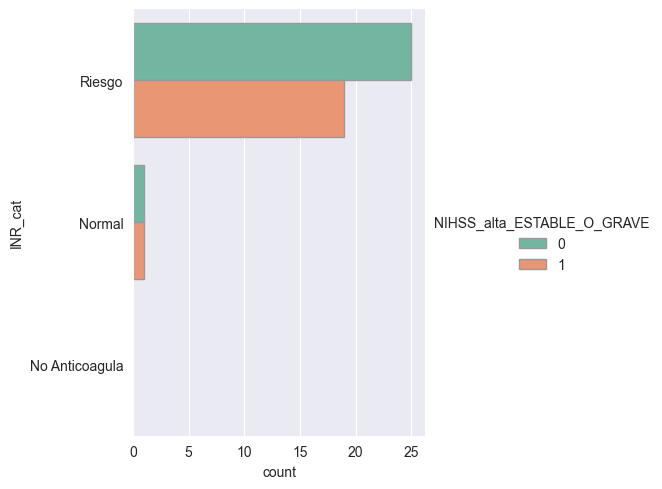

In [30]:
sns.catplot(y="INR_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [31]:
# Análisis TRIGLICERIDOS

print(f'TRIGLICERIDOS Variable min: {dataset["TRIGLICERIDOS"].min()}')
print(f'TRIGLICERIDOS Variable max: {dataset["TRIGLICERIDOS"].max()}')
print(f'TRIGLICERIDOS Variable: {dataset["TRIGLICERIDOS"].nunique()}')

TRIGLICERIDOS Variable min: 57.0
TRIGLICERIDOS Variable max: 232.0
TRIGLICERIDOS Variable: 31


In [32]:
dataset['TRIGLICERIDOS_cat'] = pd.cut(dataset['TRIGLICERIDOS'], bins=[0, 150, 200, 500, 10000], labels=['Normal', 'Límite alto', 'Alto', 'Muy Alto'])

dataset['TRIGLICERIDOS_cat'].unique()

['Normal', 'Límite alto', 'Alto']
Categories (4, object): ['Normal' < 'Límite alto' < 'Alto' < 'Muy Alto']

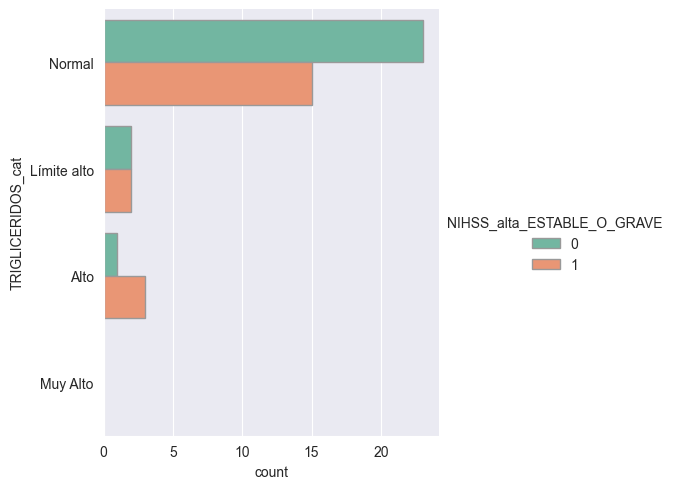

In [33]:
sns.catplot(y="TRIGLICERIDOS_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [34]:
# Análisis COL. TOTAL

print(f'COL. TOTAL Variable min: {dataset["COL. TOTAL"].min()}')
print(f'COL. TOTAL Variable max: {dataset["COL. TOTAL"].max()}')
print(f'COL. TOTAL Variable: {dataset["COL. TOTAL"].nunique()}')

COL. TOTAL Variable min: 85.0
COL. TOTAL Variable max: 342.0
COL. TOTAL Variable: 34


In [35]:
dataset['COL. TOTAL_cat'] = pd.cut(dataset['COL. TOTAL'], bins=[0, 150, 400, 1000, 100000], labels=['Normal', 'Límite alto', 'Alto', 'Muy Alto'])

dataset['COL. TOTAL_cat'].unique()

['Límite alto', 'Normal']
Categories (4, object): ['Normal' < 'Límite alto' < 'Alto' < 'Muy Alto']

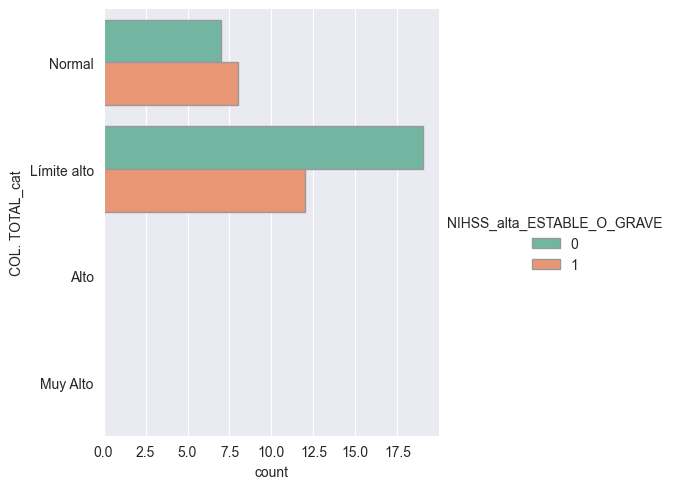

In [36]:
sns.catplot(y="COL. TOTAL_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [37]:
# Análisis EDAD

print(f'GLUCOSA Variable min: {dataset["GLUCOSA"].min()}')
print(f'GLUCOSA Variable max: {dataset["GLUCOSA"].max()}')
print(f'GLUCOSA Variable: {dataset["GLUCOSA"].nunique()}')

GLUCOSA Variable min: 82.61
GLUCOSA Variable max: 359.42
GLUCOSA Variable: 39


In [38]:
dataset['GLUCOSA_cat'] = pd.cut(dataset['GLUCOSA'], bins=[0, 90, 160, 230, 3000], labels=['Bajo', 'Normal', 'Alto', 'Muy Alto'])

dataset['GLUCOSA_cat'].unique()

['Normal', 'Muy Alto', 'Alto', 'Bajo']
Categories (4, object): ['Bajo' < 'Normal' < 'Alto' < 'Muy Alto']

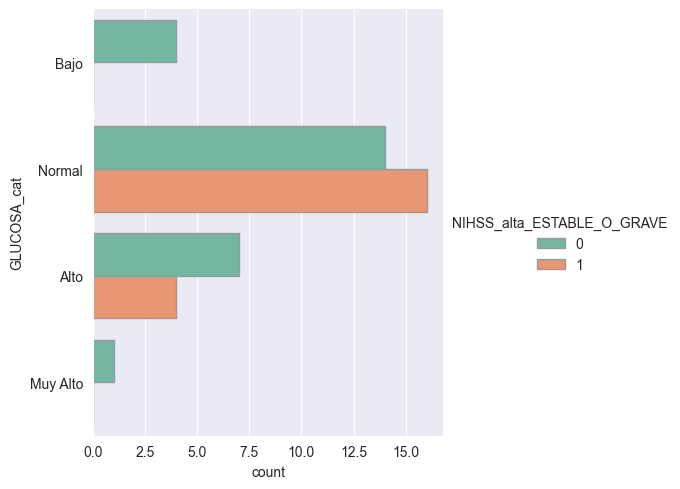

In [39]:
sns.catplot(y="GLUCOSA_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [40]:
# Análisis EDAD

print(f'EDAD Variable min: {dataset["EDAD"].min()}')
print(f'EDAD Variable max: {dataset["EDAD"].max()}')
print(f'EDAD Variable: {dataset["EDAD"].nunique()}')

EDAD Variable min: 38.0
EDAD Variable max: 90.0
EDAD Variable: 28


In [41]:
dataset['EDAD_cat'] = pd.cut(dataset['EDAD'], bins=[0, 13, 18, 45, 60, 100], labels=['Niño', 'Adolecente', 'Adulto Joven', 'Adulto', 'Anciano'])

dataset['EDAD_cat'].unique()

['Adulto', 'Anciano', 'Adulto Joven']
Categories (5, object): ['Niño' < 'Adolecente' < 'Adulto Joven' < 'Adulto' < 'Anciano']

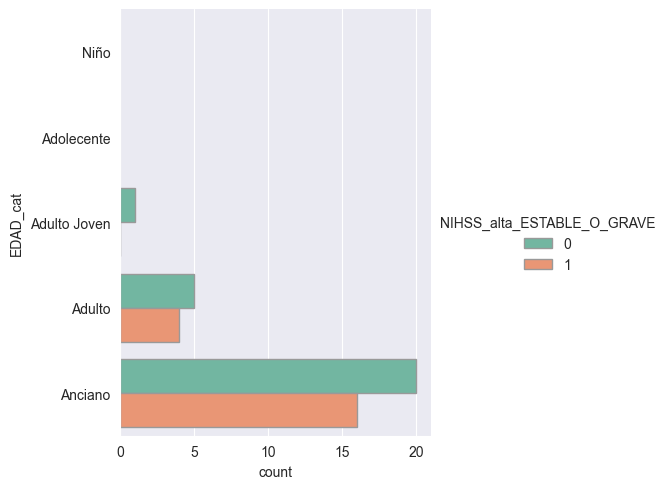

In [42]:
sns.catplot(y="EDAD_cat", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [43]:
# Análisis DIABETES

print(f'DIABETES Variable min: {dataset["DIABETES"].min()}')
print(f'DIABETES Variable max: {dataset["DIABETES"].max()}')
print(f'DIABETES Variable: {dataset["DIABETES"].nunique()}')

DIABETES Variable min: DESCONOCIDO
DIABETES Variable max: si
DIABETES Variable: 3


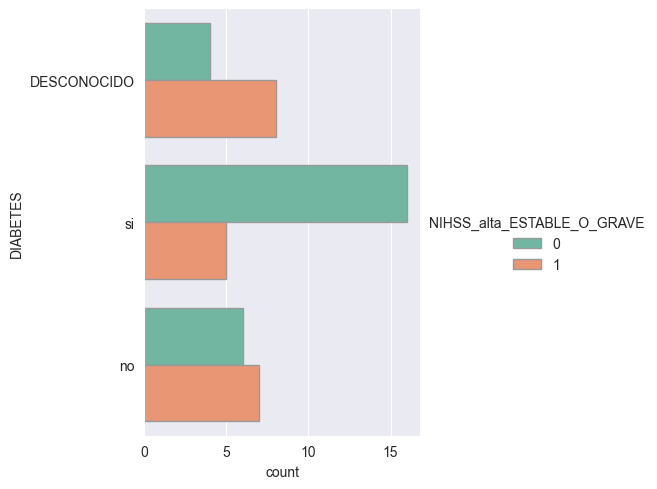

In [44]:
sns.catplot(y="DIABETES", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [45]:
# Análisis DIABETES

print(f'HTA Variable min: {dataset["HTA"].min()}')
print(f'HTA Variable max: {dataset["HTA"].max()}')
print(f'HTA Variable: {dataset["HTA"].nunique()}')

HTA Variable min: DESCONOCIDO
HTA Variable max: si
HTA Variable: 3


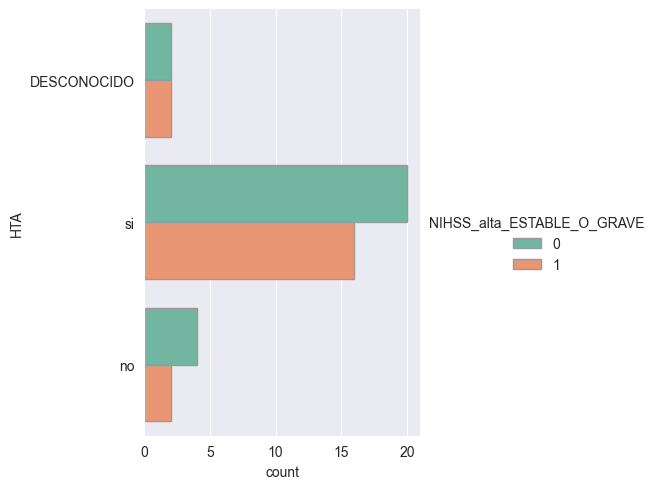

In [46]:
sns.catplot(y="HTA", hue="NIHSS_alta_ESTABLE_O_GRAVE", kind="count",
            palette="Set2", edgecolor=".6",
            data=dataset)

In [47]:
dataset.head()

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,...,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,NIHSS_INICIO_cat,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,...,Grave,1,Moderado (Buen Pronostico),Moderado,Alto,Riesgo,Normal,Límite alto,Normal,Adulto
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,...,Sin Déficit,0,Moderado (Buen Pronostico),Leve,Normal,Riesgo,Normal,Límite alto,Normal,Adulto
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Normal,Riesgo,Normal,Límite alto,Muy Alto,Anciano
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,...,Sin Déficit,0,Déficit Mínimo,Leve,Normal,Riesgo,Normal,Límite alto,Alto,Anciano
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Alto,Riesgo,Normal,Límite alto,Alto,Anciano


## Transformación de los datos

## Binary Encoding (Codificación binaria)

Lo que hace este proceso es la transformación de variables de una columna a binario si es posible

In [48]:
binary_cols = [col for col in dataset.columns if dataset[col].dtype not in [int, float]
               and dataset[col].nunique() == 2]

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols

['INR_cat', 'COL. TOTAL_cat']

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

for col in binary_cols:
    label_encoder(dataset, col)
    
dataset.head()

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,...,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,NIHSS_INICIO_cat,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat
0,DESCONOCIDO,DESCONOCIDO,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,...,Grave,1,Moderado (Buen Pronostico),Moderado,Alto,1,Normal,0,Normal,Adulto
1,si,si,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,...,Sin Déficit,0,Moderado (Buen Pronostico),Leve,Normal,1,Normal,0,Normal,Adulto
2,si,si,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Normal,1,Normal,0,Muy Alto,Anciano
3,si,si,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,...,Sin Déficit,0,Déficit Mínimo,Leve,Normal,1,Normal,0,Alto,Anciano
4,si,si,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,...,Leve (Trombolisando),0,Leve (Trombolisando),Leve,Alto,1,Normal,0,Alto,Anciano


## Label Encoding (Codificación de etiquetas)

In [50]:
labelencoder = LabelEncoder()

In [51]:
dataset["NIHSS_alta_cat"] = labelencoder.fit_transform(dataset["NIHSS_alta_cat"])
dataset["GLASGOW_cat"] = labelencoder.fit_transform(dataset["GLASGOW_cat"])
dataset["CONTEO G.B._cat"] = labelencoder.fit_transform(dataset["CONTEO G.B._cat"])
dataset["TRIGLICERIDOS_cat"] = labelencoder.fit_transform(dataset["TRIGLICERIDOS_cat"])
dataset["GLUCOSA_cat"] = labelencoder.fit_transform(dataset["GLUCOSA_cat"])
dataset["EDAD_cat"] = labelencoder.fit_transform(dataset["EDAD_cat"])
dataset["HTA"] = labelencoder.fit_transform(dataset["HTA"])
dataset["DIABETES"] = labelencoder.fit_transform(dataset["DIABETES"])

dataset.head(5)

,HTA,DIABETES,EDAD,GLUCOSA,COL. TOTAL,TRIGLICERIDOS,INR,CONTEO G.B.,GLASGOW AL INICO ACV,NIHSS INICO ACV,...,NIHSS_alta_cat,NIHSS_alta_ESTABLE_O_GRAVE,NIHSS_INICIO_cat,GLASGOW_cat,CONTEO G.B._cat,INR_cat,TRIGLICERIDOS_cat,COL. TOTAL_cat,GLUCOSA_cat,EDAD_cat
0,0,0,53.0,137.090,268.0,130.0,1.08,41.9,11.0,14.0,...,2,1,Moderado (Buen Pronostico),2,0,1,2,0,3,0
1,2,2,54.0,119.995,187.0,130.0,1.09,8.3,15.0,6.0,...,5,0,Moderado (Buen Pronostico),1,2,1,2,0,3,0
2,2,2,78.0,359.420,159.0,97.0,0.89,8.5,15.0,5.0,...,3,0,Leve (Trombolisando),1,2,1,2,0,2,2
3,2,2,87.0,186.200,193.0,133.0,0.90,7.0,15.0,1.0,...,5,0,Déficit Mínimo,1,2,1,2,0,0,2
4,2,2,69.0,170.000,184.0,137.0,1.28,12.1,15.0,3.0,...,3,0,Leve (Trombolisando),1,0,1,2,0,0,2


## One-Hot Encoding:

In [52]:
# One Hot Encoding
dataset = pd.get_dummies(dataset)


# Como son muchas columnas, muestro todas
pd.options.display.max_columns = 0

dataset.head(5)

# Lista de características para uso posterior
features = dataset.drop('NIHSS_alta_ESTABLE_O_GRAVE', axis = 1)
feature_list = list(features.columns)

# Modelo de Machine Learning

<h1 align='center'>  Árbol de Decisión </h1> 
<h2 align='center'>  Clasificación </h2> 

# Decision Tree  - Entrenamiento del algoritmo
Este algoritmo es utilizado pdecisiones te permite evaluar resultados, costos y consecuencias de una decisión compleja en grandes volúmenes datos y solventar problemas (Aplicación de un árbol de decisión difusa con clasificación de ambigüedad para determinar el exceso de peso en escolares).

En el entrenamiento del algoritmo el programa de Machine Learning adquiere la información que trabajamos en los métodos anteriores. Es aquí donde se obtendrá el conocimiento para futuras decisiones, es importante asegurarse que las decisiones que sean tomadas posteriormente al proceso de entrenamiento se añadan a la base de conocimiento del algoritmo para futuras ejecuciones de este.

La BDD trabajada actualmente cuenta con: 

In [53]:
print('Existen {} pacientes con {} variables.'.format(*dataset.shape))
print("Existen", dataset.size, "elementos")

Existen 46 pacientes con 26 variables.
Existen 1196 elementos


## Variable categórica
En el paso de la preparación de los datos de entrada, propusimos la variable “NIHSS alta ACV” que podía poseer 42 valores diferentes, la cual se clasificó y se transformó en “NIHSS_alta_cat” que contenía 6 categorías las que fueron reducidas a 1 variable con dos estados. Asi el paciente tendrá un buen pronóstico o no con el nombre de la variable “NIHSS_alta_ESTABLE_O_GRAVE”. 
Los estudios de Machine Learning no sugieren tener variables binarias para nuestro estudio.

Las variables dependientes representan el rendimiento o conclusión que se está estudiando. Las variables independientes, además conocidas en una relación estadística como regresores, representan insumos o causas, donde se encuentran las razones potenciales de alteración.

In [54]:
# variables objetivo e independientes:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_alta_ESTABLE_O_GRAVE', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_alta_ESTABLE_O_GRAVE']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Creación del modelo y entrenamiento
Para la creación del modelo se utilizará el modelo en la forma más estándar posible, siendo que los modelos, antes del entrenamiento, pueden recibir ajustes para manejar los datos de entrada, de una forma u otra. Para que sea lo más parejo posible entre modelos se dejará de forma estándar.

In [55]:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo de Arbol de Decisión (y configuramos el número máximo de nodos-hoja)
dtc = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Estructura del árbol creado

Profundidad del árbol: 3
Número de nodos terminales: 5


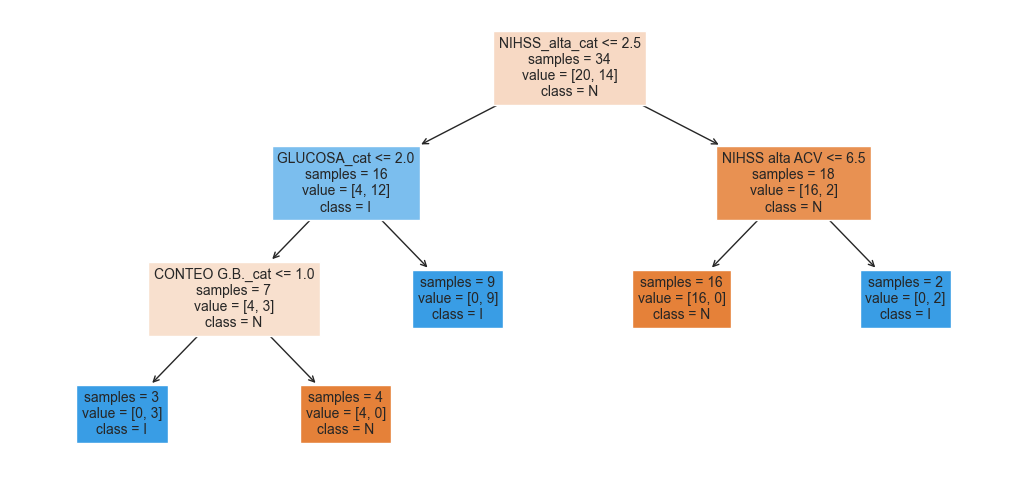

In [56]:
# Estructura del árbol creado
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {dtc.get_depth()}")
print(f"Número de nodos terminales: {dtc.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtc,
            feature_names = feature_list,
            class_names   = 'NIHSS_alta_ESTABLE_O_GRAVE',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

## Predicciones sobre los datos de prueba y métricas de rendimiento
Para llevar una forma más ordenada, es necesario crear las variables de predicciones, para asi sacar las métricas de rendimiento más fácilmente. Las métricas de rendimiento nos ofrecerán información de cómo se comportó el algoritmo durante el entrenamiento, dando a conocer valores importantes como lo son la precisión, exhaustividad, valor-F.

In [57]:
# Predicción Entrenamiento 
prediccionEntreno = dtc.predict(X_train)

# Predicción Tests
prediccionTests = dtc.predict(X_test)

In [58]:
from sklearn import metrics

print("Entrenamiento - Presición :", metrics.accuracy_score(y_train, prediccionEntreno))
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, prediccionEntreno))

Entrenamiento - Presición : 1.0
Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



La precisión de los datos de entrenamiento en el modelo tiene un valor excelente de 100% de predicción, la exhaustividad informa la cantidad de datos capaz de identificar y en este caso es de un 100% de los datos y finalmente el F1 combina los valores de precisión y exhaustividad obteniéndose un 100% igual. Todos los valores mencionados aplican para los estados de la variable predictora.

## Matriz de Confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

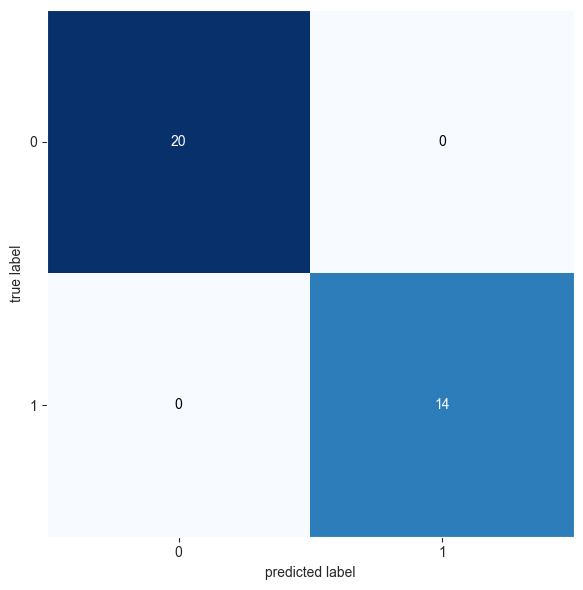

In [59]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

En la matriz de confusión (1 , 1) podemos observar el resultado en el que el modelo predice correctamente la clase positiva y en el (2, 2)  el resultado donde el modelo predice correctamente la clase negativa. Los demás elementos de la matriz contiene valor nulo o 0, estos son los errores de la predicción.

# Decision Tree - Testeo del algoritmo
El testing tiene la finalidad de llevar a cabo la prueba si el modelo funciona correctamente, identificando riesgos o erros que se produjeron en los datos. No se realizará ajustes posteriores al testing para poder comparar los algoritmos en la sección de resultados.

## Predicciones sobre los datos del testing y métricas de rendimiento
Ahora es momento de evaluar los datos ya entrenados con el testing. Las métricas de rendimiento nos ofrecerán información de cómo se comportó el algoritmo durante el entrenamiento, dando a conocer valores importantes como lo son la precisión, exhaustividad, valor-F.

In [60]:
print("Tests - Presición :", metrics.accuracy_score(y_test, prediccionTests))
print("Tests - Reporte de clasificación:\n", metrics.classification_report(y_test, prediccionTests))

Tests - Presición : 0.8333333333333334
Tests - Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



La precisión de los datos del testing en el modelo tiene un valor de 83% en ambos estados. La exhaustividad en el estado 0 alcanza un 83%.  Por otra parte, el F1 combina los valores de precisión y exhaustividad obteniéndose un 83%. 

Lo que se busca es la precisión del modelo, por consecuencia, el Algoritmo de Machine Learning Decision Tree tiene una precisión del 83,3% de predicción.

## Matriz de Confusión
Evaluaremos la matriz de confusión que se elaboró con los datos del testing.

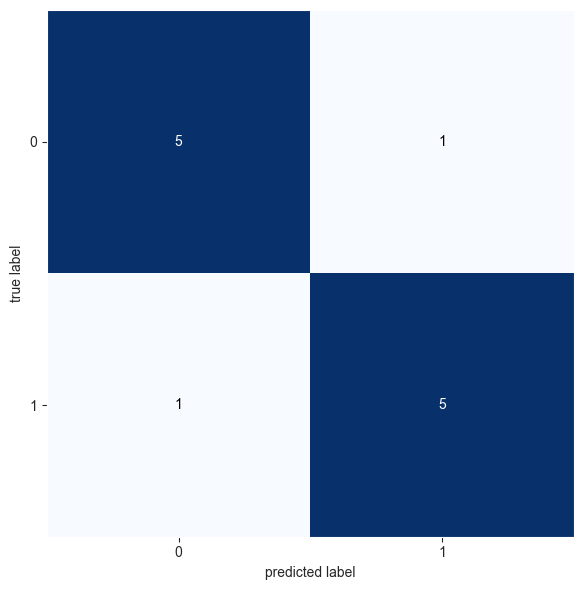

In [61]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

En la matriz de confusión (1, 1) podemos observar el resultado en el que el modelo predice correctamente la clase positiva con un alto valor y en el (2, 2) el resultado donde el modelo predice correctamente la clase negativa también con un alto valor, acercándose a la misma de la clase positiva. Los demás elementos de la matriz contienen valor pequeño, estos son los errores de la predicción. 

Las afirmaciones anteriores sugieren que la las predicciones son altas y el error es muy pequeño en la predicción.

# Decision Tree - Uso del algoritmo
El último paso de la metodología es el uso del algoritmo, nosotros lo utilizaremos para desarrollar probabilidades en los predictores. No todos los modelos poseen los mismos métodos ni atributos, por ende, se tratará de realizar comparaciones con métodos similares entre sí.

## Importancia de los predictores
Por experiencia previa y contemplando los gráficos producidos en el paso 3, sabemos que algunas características no son útiles para nuestro problema de predicción. Reducir la cantidad de funciones será la mejor alternativa, lo que acotará el tiempo de ejecución, con suerte sin comprometer significativamente el rendimiento, asi podemos examinar la importancia de las funciones de nuestro modelo. La importancia de cada predictor en el modelo se calcula como la reducción total (normalizada) en el criterio de división. Si un predictor no ha sido seleccionado en ninguna división, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [62]:
# Predicciones probabilísticas
# =======================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = dtc.predict_proba(X_test)
predicciones = pd.DataFrame(predicciones, columns = dtc.classes_)
predicciones

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,1.0,0.0
8,0.0,1.0
9,0.0,1.0


La predicción probabilistica en los estados 0 y 1 tuvo éxito al momento de la desición. Los resultados arrojados son exactos.

In [63]:
# Predicciones con clasificación final
# =====================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = dtc.predict(X_test)
predicciones = pd.DataFrame(predicciones)
predicciones

,0
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,1
9,1


Se observa un valor binario de 0 o 1, donde se muestra cada variable desarrollada en el modelo puede tomar dicho valor. El valor 0 demuestra que la tupla no logra predecir el estado 0 de la variable predictora, y por el contrario, el estado 1 es que logra la predicción del estado en esa tupla. Como reflejo de la tabla, éxiste un gran poder de predicción.

In [64]:
importancia_predictores = pd.DataFrame(
                            {'Predictor': dataset.drop(columns = "NIHSS_alta_ESTABLE_O_GRAVE").columns,
                             'importancia': dtc.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,importancia
11,NIHSS_alta_cat,0.419841
10,NIHSS alta ACV,0.215873
13,CONTEO G.B._cat,0.208163
17,GLUCOSA_cat,0.156122
0,HTA,0.000000
14,INR_cat,0.000000
23,NIHSS_INICIO_cat_Moderado (Buen Pronostico),0.000000
22,NIHSS_INICIO_cat_Leve (Trombolisando),0.000000
21,NIHSS_INICIO_cat_Grave,0.000000
20,NIHSS_INICIO_cat_Déficit Mínimo,0.000000


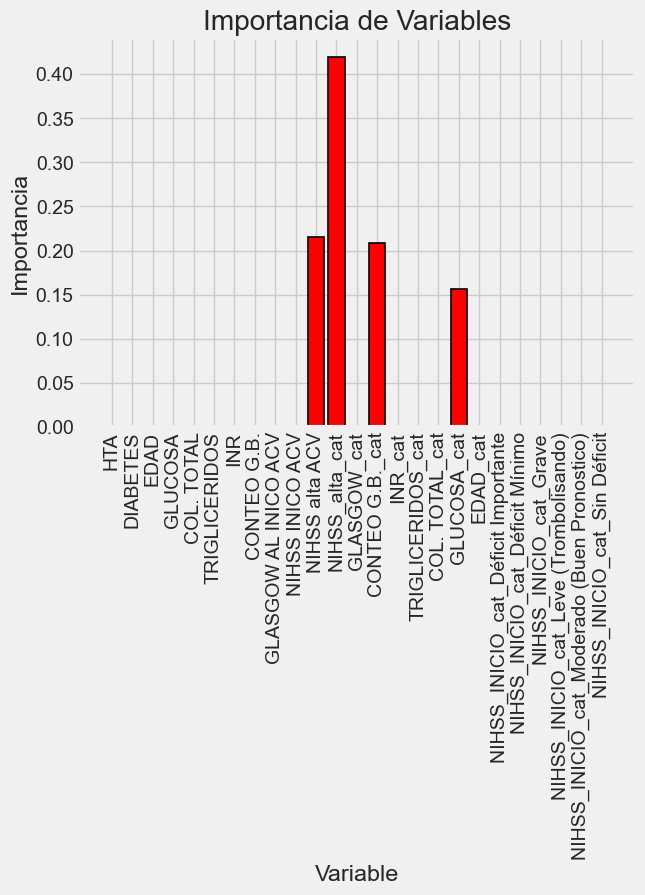

In [65]:
# Get numerical feature importances
importances = list(dtc.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Reset style 
plt.style.use('fivethirtyeight')

# lista de x ubicaciones para trazar
x_values = list(range(len(importances)))

# Gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Marque las etiquetas para el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Etiquetas de eje y título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancia de Variables');

Las variables que presentan gran importancia al momento de la predicción son “NIHSS_alta_cat”, “NIHSS alta ACV”, “CONTEO G.B._cat” y “GLUCOSA_cat” con más del 98%, siendo que el mayor predictor esta con un 41,9% que es “NIHSS_alta_cat. Se ve reflejado en el grafico la gran importancia que representan las variables mencionadas para el modelo. 

## Importancia acumulada

Ahora reduciremos la cantidad de funciones en uso por el modelo a solo aquellas requeridas para representar el 95% de la importancia. Se debe usar el mismo número de características en los conjuntos de entrenamiento y prueba.

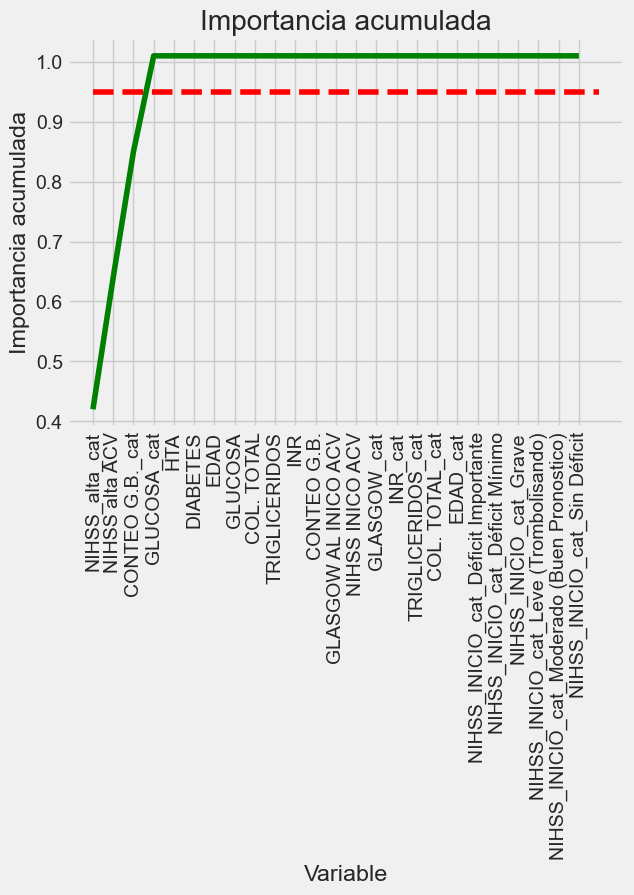

In [66]:
# Lista de funciones ordenadas de mayor a menor importancia
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Importancias acumulativas
cumulative_importances = np.cumsum(sorted_importances)

# Haz un gráfico de líneas
plt.plot(x_values, cumulative_importances, 'g-')

# Dibujar línea al 95% de importancia retenida
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Formato x ticks y etiquetas
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Etiquetas de eje y título
plt.xlabel('Variable'); plt.ylabel('Importancia acumulada'); plt.title('Importancia acumulada');

In [67]:
# Encuentre el número de características para una importancia acumulada del 95%
# Agregue 1 porque Python está indexado a cero
print('Número de columna para el 95 % de importancia:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Número de columna para el 95 % de importancia: 4


En el gráfico de importancia acumulada la curva se dispara con la “GLUCOSA_cat” y se ratifica con el resultado del 95% de importancia medido anteriormente.

# Modelo de Machine Learning

<h1 align='center'>  Árbol de Decisión </h1> 
<h2 align='center'>  Regresión </h2> 

# 5-. Entrenar el modelo en los datos de entrenamiento

In [413]:
# variables objetivo e independientes:
from sklearn.model_selection import train_test_split

# X son nuestras variables independientes
X = dataset.drop('NIHSS_alta_ESTABLE_O_GRAVE', axis = 1)

# y es nuestra variable dependiente
y = dataset['NIHSS_alta_ESTABLE_O_GRAVE']

# Uso de Skicit-learn para dividir datos en conjuntos de entrenamiento y prueba 
# División 75% de datos para entrenamiento, 25% de datos para test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

## Creamos el modelo y entrenamos

In [414]:
from sklearn.tree import DecisionTreeRegressor

# Creamos el modelo de Arbol de Decisión (y configuramos el número máximo de nodos-hoja)
dtr = DecisionTreeRegressor(max_depth = 5, random_state=0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

### Estructura del árbol creado

Profundidad del árbol: 2
Número de nodos terminales: 3


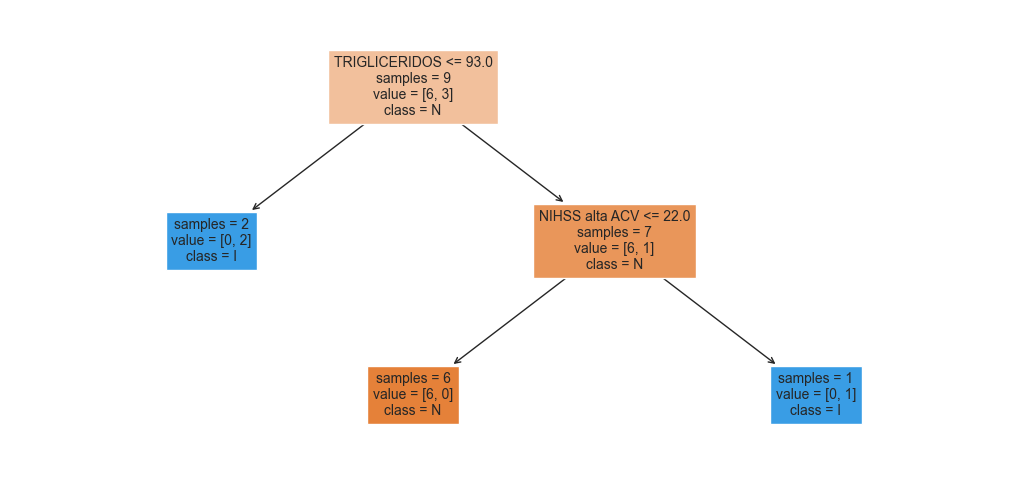

In [421]:
# Estructura del árbol creado
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(13, 6))

print(f"Profundidad del árbol: {dtr.get_depth()}")
print(f"Número de nodos terminales: {dtr.get_n_leaves()}")

plot = plot_tree(
            decision_tree = dtc,
            feature_names = feature_list,
            class_names   = 'NIHSS_alta_ESTABLE_O_GRAVE',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

# 6-. Predicciones sobre los datos de prueba
Se evalúa la capacidad predictiva del árbol inicial calculando el accuracy en el conjunto de test.

In [416]:
# Predicción Entrenamiento 
prediccionEntreno = dtr.predict(X_train)

# Predicción Tests
prediccionTests = dtr.predict(X_test)

# Fase de Entrenamiento

In [417]:
from sklearn import metrics

print("Entrenamiento - Presición :", metrics.accuracy_score(y_train, prediccionEntreno))
print("Entrenamiento - Reporte de clasificación:\n", metrics.classification_report(y_train, prediccionEntreno))

Entrenamiento - Presición : 1.0
Entrenamiento - Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Matriz de Confusión

En el campo de la inteligencia artificial y en especial en el problema de la clasificación estadística, una matriz de confusión es una herramienta que permite la visualización del desempeño de un algoritmo que se emplea en aprendizaje supervisado.

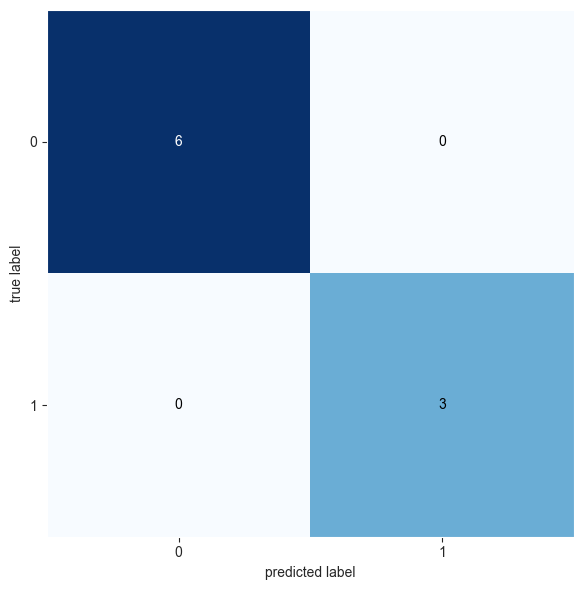

In [418]:
from matplotlib import pyplot as plot
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_train, prediccionEntreno)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plot.tight_layout()

# 7-. Comparar las predicciones con los objetivos conocidos del conjunto de pruebas y calcule las métricas de rendimiento
Una vez entrenado el modelo, se pueden predecir nuevas observaciones.

# Fase de validación (Usando datos de Test)

In [419]:
print("Tests - Presición :", metrics.accuracy_score(y_test, prediccionTests))
print("Tests - Reporte de clasificación:\n", metrics.classification_report(y_test, prediccionTests))

Tests - Presición : 0.5945945945945946
Tests - Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.59      0.80      0.68        20
           1       0.60      0.35      0.44        17

    accuracy                           0.59        37
   macro avg       0.60      0.58      0.56        37
weighted avg       0.60      0.59      0.57        37



### Matriz de Confusión

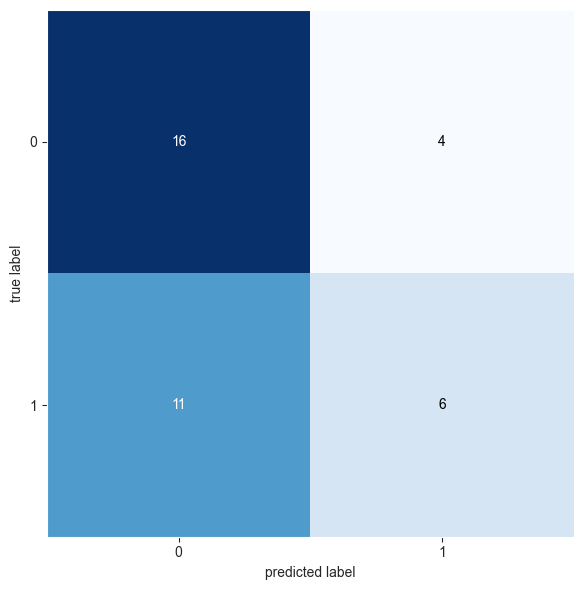

In [420]:
matriz = confusion_matrix(y_test, prediccionTests)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()

# 8-. Importancia de los predictores
Por experiencia previa y los gráficos producidos al principio, sabemos que algunas características no son útiles para nuestro problema de predicción. Para reducir la cantidad de funciones, lo que reducirá el tiempo de ejecución, con suerte sin reducir significativamente el rendimiento, podemos examinar la importancia de las funciones del Arbol de Decisión.

## Interpretación el modelo, reporte los resultados visual y numéricamente

La importancia de cada predictor en modelo se calcula como la reducción total (normalizada) en el criterio de división, en este caso el índice Gini, que consigue el predictor en las divisiones en las que participa. Si un predictor no ha sido seleccionado en ninguna divisón, no se ha incluido en el modelo y por lo tanto su importancia es 0.

In [438]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones = dtc.predict_proba(X = X_test)
predicciones = pd.DataFrame(predicciones, columns = dtc.classes_)
predicciones.head(3)

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0


In [439]:
# Predicciones con clasificación final
# ==============================================================================
# Con .predict() se obtiene, para cada observación, la clasificación predicha por
# el modelo. Esta clasificación se corresponde con la clase con mayor probabilidad.
predicciones = dtc.predict(X = X_test)
predicciones

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [426]:
importancia_predictores = pd.DataFrame(
                            {'Predictor': dataset.drop(columns = "NIHSS_alta_ESTABLE_O_GRAVE").columns,
                             'importancia': dtc.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,importancia
5,TRIGLICERIDOS,0.571429
10,NIHSS alta ACV,0.428571
0,HTA,0.000000
14,INR_cat,0.000000
23,NIHSS_INICIO_cat_Moderado (Buen Pronostico),0.000000
22,NIHSS_INICIO_cat_Leve (Trombolisando),0.000000
21,NIHSS_INICIO_cat_Grave,0.000000
20,NIHSS_INICIO_cat_Déficit Mínimo,0.000000
19,NIHSS_INICIO_cat_Déficit Importante,0.000000
18,EDAD_cat,0.000000


In [424]:
# Lista de características para uso posterior
features = dataset.drop('NIHSS_alta_ESTABLE_O_GRAVE', axis = 1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(dtc.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: TRIGLICERIDOS        Importance: 0.57
Variable: NIHSS alta ACV       Importance: 0.43
Variable: HTA                  Importance: 0.0
Variable: DIABETES             Importance: 0.0
Variable: EDAD                 Importance: 0.0
Variable: GLUCOSA              Importance: 0.0
Variable: COL. TOTAL           Importance: 0.0
Variable: INR                  Importance: 0.0
Variable: CONTEO G.B.          Importance: 0.0
Variable: GLASGOW AL INICO ACV Importance: 0.0
Variable: NIHSS INICO ACV      Importance: 0.0
Variable: NIHSS_alta_cat       Importance: 0.0
Variable: GLASGOW_cat          Importance: 0.0
Variable: CONTEO G.B._cat      Importance: 0.0
Variable: INR_cat              Importance: 0.0
Variable: TRIGLICERIDOS_cat    Importance: 0.0
Variable: COL. TOTAL_cat       Importance: 0.0
Variable: GLUCOSA_cat          Importance: 0.0
Variable: EDAD_cat             Importance: 0.0
Variable: NIHSS_INICIO_cat_Déficit Importante Importance: 0.0
Variable: NIHSS_INICIO_cat_Déficit Mínimo I

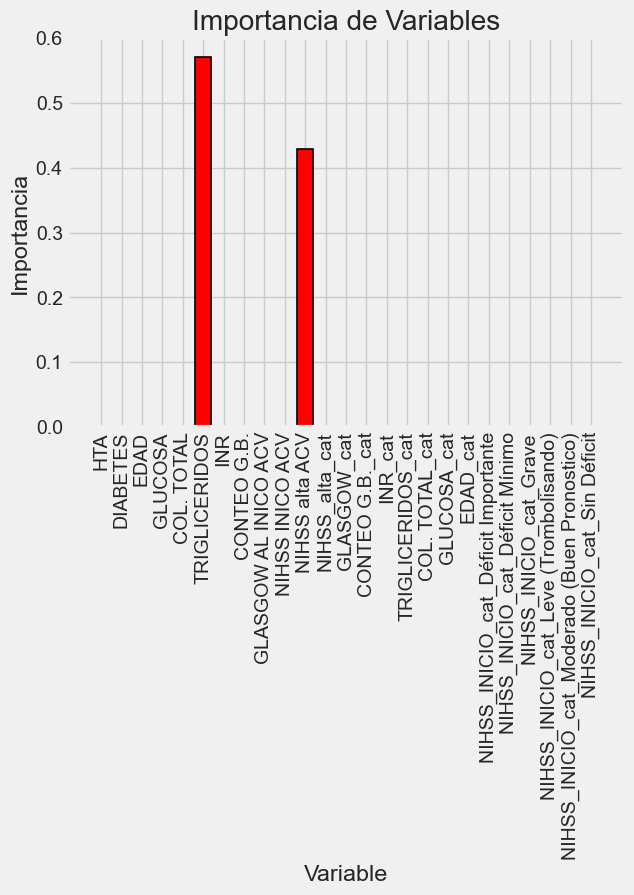

In [425]:
# Reset style 
plt.style.use('fivethirtyeight')

# lista de x ubicaciones para trazar
x_values = list(range(len(importances)))

# Gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Marque las etiquetas para el eje x
plt.xticks(x_values, feature_list, rotation='vertical')

# Etiquetas de eje y título
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title('Importancia de Variables');

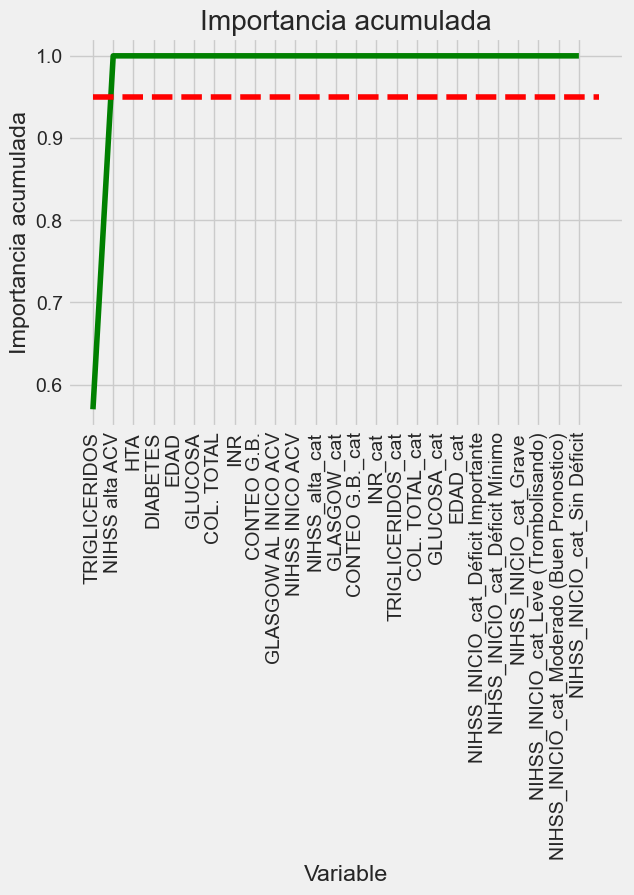

In [433]:
# Lista de funciones ordenadas de mayor a menor importancia
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Importancias acumulativas
cumulative_importances = np.cumsum(sorted_importances)

# Haz un gráfico de líneas
plt.plot(x_values, cumulative_importances, 'g-')

# Dibujar línea al 95% de importancia retenida
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Formato x ticks y etiquetas
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Etiquetas de eje y título
plt.xlabel('Variable'); plt.ylabel('Importancia acumulada'); plt.title('Importancia acumulada');

### Limite el número de características
Ahora reduciremos la cantidad de funciones en uso por el modelo a solo aquellas requeridas para representar el 95% de la importancia. Se debe usar el mismo número de características en los conjuntos de entrenamiento y prueba.

In [434]:
# Encuentre el número de características para una importancia acumulada del 95%
# Agregue 1 porque Python está indexado a cero
print('Número de columna para el 95 % de importancia:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Número de columna para el 95 % de importancia: 2


# Extrapolación con modelos de árboles

Una límitación importante de los árboles de regresión es que no extrapolan fuera del rango de entrenamiento. Cuando se aplica el modelo a una nueva observación, cuyo valor o valores de los predictores son superiores o inferiores a los observados en el entrenamiento, la predicción siempre es la media del nodo más cercano, independientemente de cuanto se aleje el valor. Vease el siguiente ejemplo en el que se entrenan dos modelos, un modelo lineal y un arbol de regresión, y luego se predicen valores de  X  fuera del rango de entrenamiento.

In [324]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

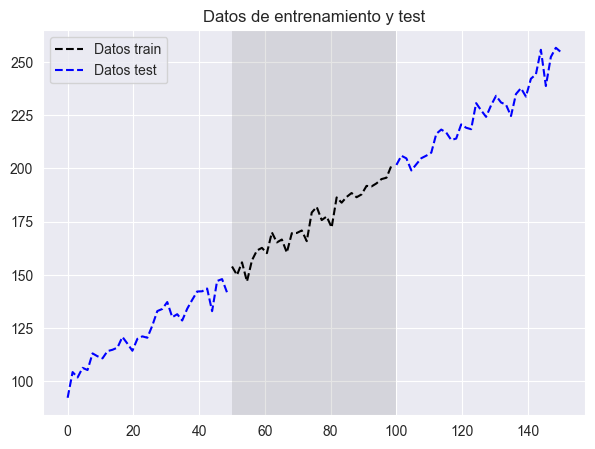

In [325]:
# Datos simulados
# ------------------------------------------------------------------------------
X = np.linspace(0, 150, 100)
y = (X + 100) + np.random.normal(loc=0.0, scale=5.0, size=X.shape)
X_train = X[(X>=50) & (X<100)]
y_train = y[(X>=50) & (X<100)]
X_test_inf = X[X < 50]
y_test_inf = y[X < 50]
X_test_sup = X[X >= 100]
y_test_sup = y[X >= 100]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.set_title("Datos de entrenamiento y test")
plt.legend();

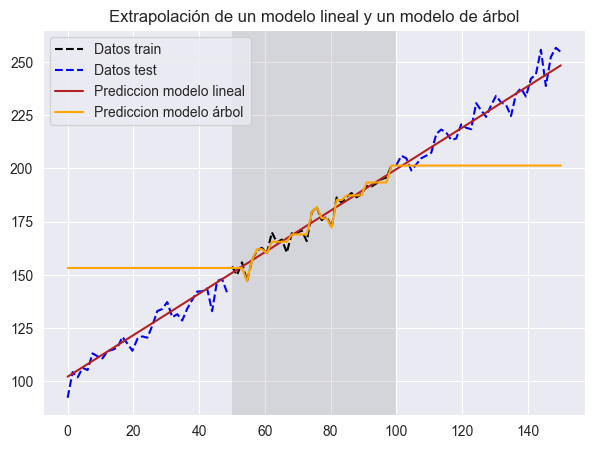

In [326]:
# Modelo lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train.reshape(-1, 1), y_train)

# Modelo árbol
modelo_tree = DecisionTreeRegressor(max_depth=4)
modelo_tree.fit(X_train.reshape(-1, 1), y_train)

# Predicciones
prediccion_lineal = modelo_lineal.predict(X.reshape(-1, 1))
prediccion_tree   = modelo_tree.predict(X.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.plot(X, prediccion_lineal, c='firebrick',
        label = "Prediccion modelo lineal")
ax.plot(X, prediccion_tree, c='orange',
        label = "Prediccion modelo árbol")
ax.set_title("Extrapolación de un modelo lineal y un modelo de árbol")
plt.legend();